Kernelized Support Vector Machines

In [1]:
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [7]:
from sklearn.datasets import make_blobs

In [8]:
X, y = make_blobs(centers=4, random_state=8)

In [9]:
y = y % 2

Text(0, 0.5, 'Feature 1')

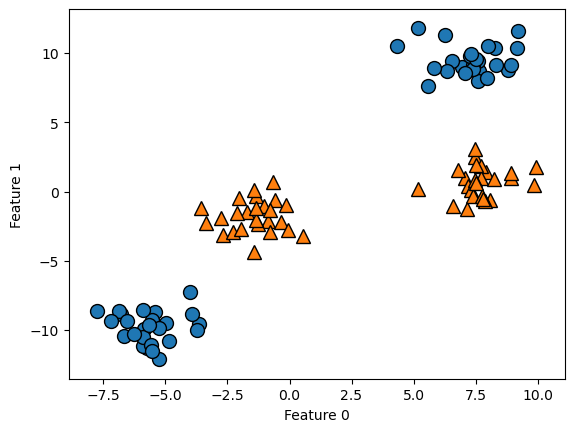

In [10]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

A linear model for classification can only separate points using a line, and will not be
able to do a very good job on this dataset

In [11]:
from sklearn.svm import LinearSVC

In [12]:
linear_svm = LinearSVC().fit(X, y)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

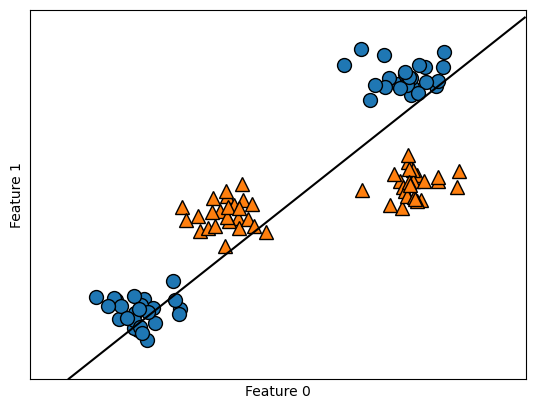

In [13]:
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Now let’s expand the set of input features, say by also adding feature1 ** 2, the
square of the second feature, as a new feature. Instead of representing each data point
as a two-dimensional point, (feature0, feature1), we now represent it as a threedimensional point, (feature0, feature1, feature1 ** 2).

In [14]:
X_new = np.hstack([X, X[:, 1:] ** 2])

In [15]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

In [16]:
figure = plt.figure()

<Figure size 640x480 with 0 Axes>

# visualize in 3D

In [17]:
ax = Axes3D(figure, elev=-152, azim=-26)

In [18]:
# plot first all the points with y == 0, then all with y == 1

In [19]:
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\hp\AppData\Local\Temp\ipykernel_6832\3285014256.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
C:\Users\hp\AppData\Local\Temp\ipykernel_6832\3285014256.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

In the new representation of the data, it is now indeed possible to separate the two
classes using a linear model, a plane in three dimensions. We can confirm this by fit‐
ting a linear model to the augmented data

In [20]:
linear_svm_3d = LinearSVC().fit(X_new, y)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [21]:
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

In [22]:
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")

C:\Users\hp\AppData\Local\Temp\ipykernel_6832\924300527.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
C:\Users\hp\AppData\Local\Temp\ipykernel_6832\924300527.py:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature0 ** 2')

<Figure size 640x480 with 0 Axes>

As a function of the original features, the linear SVM model is not actually linear any‐
more. It is not a line, but more of an ellipse, as you can see from the plot created here